### Load the Data Set

In [5]:
from data_loader import load_data

data_dir = "./data"
X, y = load_data(data_dir)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape[0]}, Val: {X_val.shape[0]}, Test: {X_test.shape[0]}")

Loading data from: ../D3-CNN/data


Loading classes: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:05<00:00,  1.14it/s]


Successfully loaded 1200 images
Train: 768, Val: 192, Test: 240


### train model

In [ ]:
from cnn import CNN

model = CNN()
model.train(X_train,
            y_train,
            X_val,
            y_val,
            epochs=8,
            batch_size=32,
            learning_rate=0.1,
            checkpoint_dir="./checkpoints",
            checkpoint_freq=1)

test_acc = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")

# Save the trained model
model_path = "./d3_cnn_model.pkl"
model.save_model(model_path)


training started ............

Processing Batch: 0 with batch size: 32
Processing Batch: 1 with batch size: 32
Processing Batch: 2 with batch size: 32


### resume trainig

In [ ]:
from cnn import CNN

model = CNN()
model.train(X_train,
            y_train,
            X_val,
            y_val,
            epochs=3,
            batch_size=32,
            learning_rate=0.01,
            checkpoint_dir="./checkpoints",
            checkpoint_freq=1,
            resume_from="./checkpoints/epoch_20.ckpt")


test_acc = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")


model_path = "./d3_cnn_model.pkl"
model.save_model(model_path)

### Evaluate Model

In [7]:
from cnn import CNN

model_path = "./d3-2_cnn_model.ckpt"

model = CNN()
model.load_model(model_path)


test_acc = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")

Loaded checkpoint from epoch 11
Model loaded from ./d3-2_cnn_model.ckpt
Test Accuracy: 0.8667
Final Test Accuracy: 86.67%


['epoch_1.ckpt', 'epoch_2.ckpt', 'epoch_3.ckpt', 'epoch_4.ckpt', 'epoch_5.ckpt', 'epoch_6.ckpt', 'epoch_7.ckpt', 'epoch_8.ckpt', 'epoch_9.ckpt', 'epoch_10.ckpt', 'epoch_11.ckpt']
2.416640380446724
Loaded checkpoint from ./checkpoints/epoch_1.ckpt
1.6359708481422999
Loaded checkpoint from ./checkpoints/epoch_2.ckpt
1.4648669343769296
Loaded checkpoint from ./checkpoints/epoch_3.ckpt
1.258474877580606
Loaded checkpoint from ./checkpoints/epoch_4.ckpt
1.0292238109877152
Loaded checkpoint from ./checkpoints/epoch_5.ckpt
0.8348430029838821
Loaded checkpoint from ./checkpoints/epoch_6.ckpt
0.6660669016471881
Loaded checkpoint from ./checkpoints/epoch_7.ckpt
0.45450096663951206
Loaded checkpoint from ./checkpoints/epoch_8.ckpt
0.30219033018660313
Loaded checkpoint from ./checkpoints/epoch_9.ckpt
0.2693791869175603
Loaded checkpoint from ./checkpoints/epoch_10.ckpt
0.251577430000834
Loaded checkpoint from ./checkpoints/epoch_11.ckpt


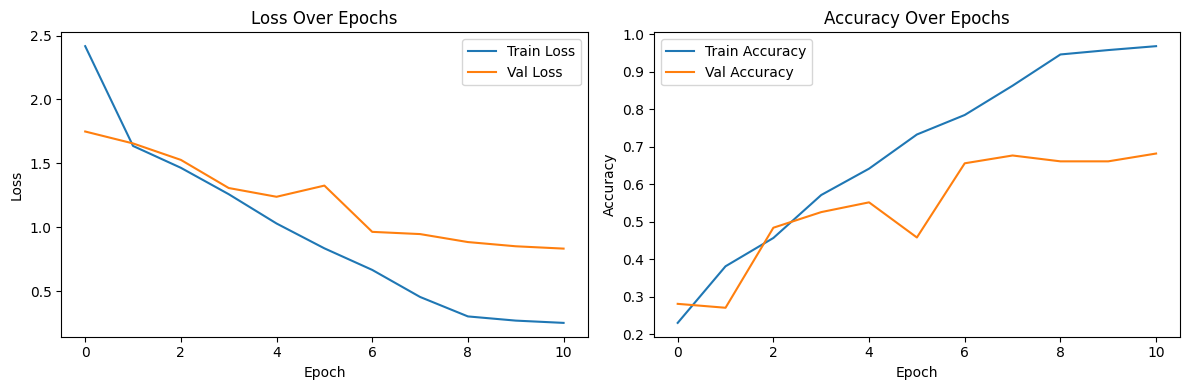

In [2]:
from cnn import CNN

model = CNN()
model.plot_training_history_from_dir("./checkpoints")